<h1 style="font-size:3rem;color:#6667AB;">TP 4</h1>

## Méthodes de Simulation Informatique
### Amaya Nogales Gómez

<h2> Apprentissage supervisé </h2> 

<h2> Partie 2: The kernel trick. Separation non lineare.</h2>

Si les données ne sont pas linéairement séparables dans l'espace d'origine, nous pourrions alors appliquer des transformations aux données, qui mappent les données de l'espace d'origine dans un espace de caractéristiques de dimension supérieure, également appelée astuce du noyau.

L'objectif est qu'après la transformation vers l'espace de dimension supérieure, les classes deviennent linéairement séparables dans cet espace de caractéristiques de dimension supérieure.

Nous pouvons ensuite ajuster une frontière de décision pour séparer les classes et faire des prédictions. La frontière de décision sera un hyperplan dans cet espace de dimension supérieure.

Puisqu'il est difficile de visualiser des données de grande dimension, nous nous concentrons d'abord sur quelques exemples de $\mathbb{R}\rightarrow\mathbb{R}^2$ transformations.



In [1]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets, metrics
from sklearn.datasets import make_circles
import glob
import os
from mpl_toolkits.mplot3d import Axes3D
import IPython.display as IPdisplay
import pandas as pd
import random 
import math
from PIL import Image
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

Dans cet exemple, nous traçons d'abord nos points de données d'origine.

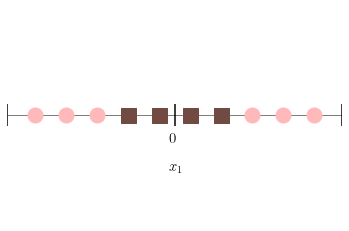

In [2]:
X1=np.linspace(-5,5,10)
Y1=np.array([1,1,1,0,0,0,0,1,1,1])
C=np.array([2,2,2,2,2,2,2,2,2,2])
fig = plt.figure()
ax = fig.add_subplot(111)
# dessiner lignes
xmin = -6
xmax = 6
y = 2
height = 1
ax.set_xlim(xmin,xmax)
ax.set_ylim(y-2,y+2)

plt.hlines(y, xmin, xmax,'k',linewidth=0.5)
plt.vlines(xmin, 1.8, 2.2,'k')
plt.vlines(xmax, 1.8, 2.2,'k')
# dessiner points sur la ligne

plt.vlines(0, 1.8, 2.2,'k')
plt.text(-0.2,1.5,r"$0$",fontsize=15)
plt.text(-0.2,1,r"$x_1$",fontsize=15)


plt.plot(X1[Y1==1],C[Y1==1], 'o', ms = 15, color='#FFB9BA')
plt.plot(X1[Y1==0],C[Y1==0], 's', ms = 15, color='#714A41')




plt.axis('off')
plt.show()

#plt.savefig('line.pdf')

Dans $\mathbb{R}$ (dimension 1), ces données ne sont pas linéairement séparables, mais après application de l'astuce du noyau, avec $\phi(x_1)=(x_1,x_1^2)$ et en ajoutant cette seconde dimension à notre espace de caractéristiques, les classes deviennent linéairement séparables.

Bien que sklearn ait la propriété de changer le noyau directement avec le paramètre "kernel", nous allons faire la transformation nous-mêmes puis résoudre le SVM pour les données transformées.

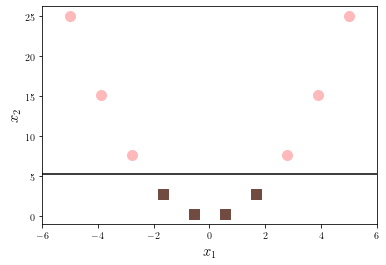

Accuracy of 100.00


In [3]:
X1_p=X1
X2_p=X1[:]*X1[:]

X1_PRO=np.c_[X1_p, X2_p]
fig = plt.figure()
ax  = fig.add_subplot(111)
plt.scatter(X1_PRO[Y1==1][:, 0], X1_PRO[Y1==1][:, 1], color='#FFB9BA', marker='o', s = 100)
plt.scatter(X1_PRO[Y1==0][:, 0], X1_PRO[Y1==0][:, 1], color='#714A41', marker='s', s=100)

ax.set_xlim(-6,6)
model = svm.SVC(kernel='linear')
clf = model.fit(X1_PRO, Y1)

x = np.linspace(-6,6,30)
z = (-clf.intercept_[0]-clf.coef_[0][0]*x) / clf.coef_[0][1]

ax.plot(x,z,'k')
plt.xlabel(r"$x_1$",fontsize=15)
plt.ylabel(r"$x_2$",fontsize=15)

y_pred=clf.predict(X1_PRO)


plt.show()

print("Accuracy of %.2f" %(metrics.accuracy_score(Y1, y_pred)*100))

## Questions:


**1-** Répétez l'exemple ci-dessus pour $x_1=$X1, $y=[1,1,1,1,0,0,0,0,0,1]$, $\phi(x_1)=(x_1,2x_1^2+3)$.

1.1. Dessinez (X1,Y1).

1.2. Calculez X_1PRO, la projection de X1 en $\mathbb{R}^2$.

1.3. Calculez l'hyperplane SVM pour X1_PRO data et Y1 etiquette.

1.4. Dessinez X1_PRO et l'hyperplane SVM

1.5. Calculez la precision.


**2-** Répétez l'exemple ci-dessus pour $x_1=$np.linspace(0,19,20), $y=[1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]$, $\phi(x_1)=(x_1,x_1 mod\, 2)$.
    
2.1. Plot (X1,Y1).

2.2. Calculez X_1PRO, la projection de X1 en $\mathbb{R}^2$.

2.3. Calculez l'hyperplane SVM pour X1_PRO data et Y1 etiquette.

2.4. Dessinez X1_PRO et l'hyperplane SVM

2.5. Calculez la precision.



## Et maintenant en 3D: $\mathbb{R}^2 \rightarrow \mathbb{R}^3$ 

Reprenons maintenant l'exemple vu au cours 4 où nos données d'origine ne sont pas linéairement séparables en dimension 2. Voici nos données non linéairement séparables, dans l'espace d'entrée.

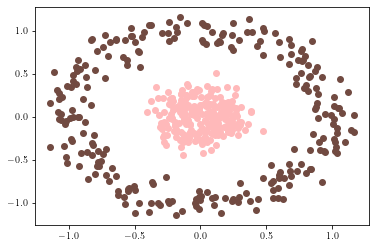

In [4]:
# Generation des donnees
X1, Y1 = make_circles(n_samples=500, noise=0.1, factor=0.2)
frac0 = len(np.where(Y1 == 0)[0]) / float(len(Y1))
frac1 = len(np.where(Y1 == 1)[0]) / float(len(Y1))
 

plt.subplot(111)
plt.scatter(X1[Y1==1][:, 0], X1[Y1==1][:, 1], color='#FFB9BA', marker='o', s=30, linewidth=1.5, label= "Class +1:versicolor")
plt.scatter(X1[Y1==0][:, 0], X1[Y1==0][:, 1], color='#714A41', marker='o', s=30, linewidth=1.5, label = "Class -1:setosa")

plt.show()
#plt.savefig('circles.pdf')

Et après avoir appliqué la transformation $\phi(x_1,x_2)=(x_1^2,\sqrt{2}x_1x_2,x_2^2)$:

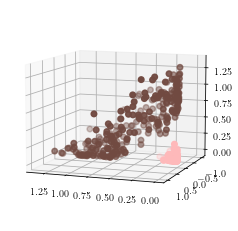

In [5]:
X1_p=X1[:,0]*X1[:,0]
X2_p=math.sqrt(2)*X1[:,0]*X1[:,1]
X3_p=X1[:,1]*X1[:,1]

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.scatter3D(X1_p[Y1==1], X2_p[Y1==1],X3_p[Y1==1],color='#FFB9BA', marker='o', s=30, linewidth=1.5)
ax.scatter3D(X1_p[Y1==0], X2_p[Y1==0],X3_p[Y1==0],color='#714A41', marker='o', s=30, linewidth=1.5)


ax.view_init(9, 110)

Nous pouvons maintenant obtenir le SVM pour les données transformées, étant sûr que nous sommes en mesure de trouver un hyperplan qui sépare les données.

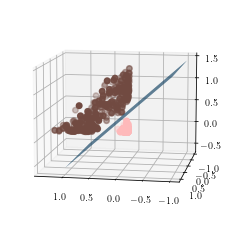

In [8]:
X1_p=X1[:,0]*X1[:,0]
X2_p=math.sqrt(2)*X1[:,0]*X1[:,1]
X3_p=X1[:,1]*X1[:,1]

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.scatter3D(X1_p[Y1==1], X2_p[Y1==1],X3_p[Y1==1],color='#FFB9BA', marker='o', s=30, linewidth=1.5)
ax.scatter3D(X1_p[Y1==0], X2_p[Y1==0],X3_p[Y1==0],color='#714A41', marker='o', s=30, linewidth=1.5)



X1_PRO=np.c_[X1_p, X2_p, X3_p]


model = svm.SVC(kernel='linear')
clf = model.fit(X1_PRO, Y1)


z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]
tmp = np.linspace(-1,1,30)
x,y = np.meshgrid(tmp,tmp)
ax.plot_surface(x, y, z(x,y))

ax.view_init(10, 100)

Et si nous voulons voir la belle image 3D en mouvement...

In [7]:
save_folder = 'images/phase-animate'

gif_filename = '01-pan-rotate-zoom-demo'
working_folder = '{}/{}'.format(save_folder, gif_filename)
if not os.path.exists(working_folder):
    os.makedirs(working_folder)

fig = plt.figure(figsize=(14, 10), dpi=80)
#ax = Axes3D(fig)
ax  = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
ax.plot_surface(x, y, z(x,y),alpha=0.5)
ax.scatter3D(X1_p[Y1==1], X2_p[Y1==1],X3_p[Y1==1],color='#FFB9BA', marker='o', s=30, linewidth=1.5)
ax.scatter3D(X1_p[Y1==0], X2_p[Y1==0],X3_p[Y1==0],color='#714A41', marker='o', s=30, linewidth=1.5)  
ax.plot_surface(x, y, z(x,y),alpha=0.5, color='#667E91')



    

# create 36 frames for the animated gif
steps = 36

# a viewing perspective is composed of an elevation, distance, and azimuth
# define the range of values we'll cycle through for the distance of the viewing perspective
min_dist = 14.
max_dist = 20.
dist_range = np.arange(min_dist, max_dist, (max_dist-min_dist)/steps)

# define the range of values we'll cycle through for the elevation of the viewing perspective
min_elev = 10.
max_elev = 50.
elev_range = np.arange(max_elev, min_elev, (min_elev-max_elev)/steps)

# now create the individual frames that will be combined later into the animation
for azimuth in range(0, 360, int(360/steps)):
    
    # pan down, rotate around, and zoom out
    ax.azim = float(azimuth/3.)
    ax.elev = elev_range[int(azimuth/(360./steps))]
    ax.dist = dist_range[int(azimuth/(360./steps))]
    
    # set the figure title to the viewing perspective, and save each figure as a .png
   # fig.suptitle('elev={:.1f}, azim={:.1f}, dist={:.1f}'.format(ax.elev, ax.azim, ax.dist))
    plt.savefig('{}/{}/img{:03d}.png'.format(save_folder, gif_filename, azimuth))
    
    
# don't display the static plot...
#ax.view_init(30, 60)
plt.close()


# load all the static images into a list then save as an animated gif
gif_filepath = '{}/{}.gif'.format(save_folder, gif_filename)
images = [Image.open(image) for image in sorted(glob.glob('{}/*.png'.format(working_folder)))]
gif = images[0]
gif.info['duration'] = 100 #milliseconds per frame
gif.info['loop'] = 0 #how many times to loop (0=infinite)
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:])
IPdisplay.Image(url=gif_filepath)




## Questions:

**3-** Répétez l'exemple ci-dessus pour $x_1$ and $y$ du premier exemple:<br />
$x_1=np.linspace(-5,5,10)$,<br /> $y=[1,1,1,0,0,0,0,1,1,1]$,<br /> and $\phi(x_1)=(x_1,x_1^2,x_1^2)$.

3.1. Dessinez (X1,Y1).

3.2. Calculez X_1PRO, la projection de X1 en $\mathbb{R}^3$.

3.3. Calculez l'hyperplane SVM pour X1_PRO data et Y1 etiquette.

3.4. Dessinez X1_PRO et l'hyperplane SVM

3.5. Calculez la precision.

3.* Dessinez le gif anime pour X1_PRO l'hyperplane SVM.



**4-** Répétez l'exemple ci-dessus pour $x_1$ et $y$ de l'exercise 2:<br /> 
$x_1=np.linspace(0,19,20)$<br />
$y=[1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]$,<br />
et $\phi(x_1)=(x_1,20*(x_1 mod\, 2),20*(x_1\, mod\, 2))$.

   
4.1. Dessinez (X1,Y1).

4.2. Calculez X_1PRO, la projection de X1 en $\mathbb{R}^3$.

4.3. Calculez l'hyperplane SVM pour X1_PRO data et Y1 etiquette.

4.4. Dessinez X1_PRO et l'hyperplane SVM

4.5. Calculez la precision.

4.* Dessinez le gif anime pour X1_PRO l'hyperplane SVM.